<a href="https://colab.research.google.com/github/jprostick/neur265joe/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Joseph Prostick
#*Neur 265*
#**3/24/23**

In [ ]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
patch_seq = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv"))



In [ ]:
#removes empty values
patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

Text(0, 0.5, 'Count')

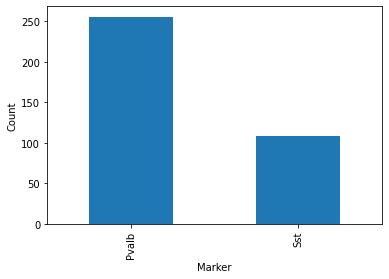

In [ ]:
#creates bar graph of counts of neurons with each marker type
ct = patch_seq["Marker"].value_counts()
ax = ct.plot(kind="bar")
ax.set_xlabel("Marker")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

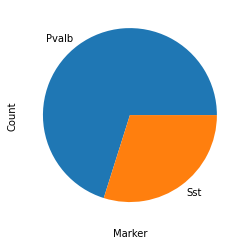

In [ ]:
#create pie chart of counts of each marker
ax = ct.plot(kind="pie")
ax.set_xlabel("Marker")
ax.set_ylabel("Count")

Text(0, 0.5, 'Fast_Trough')

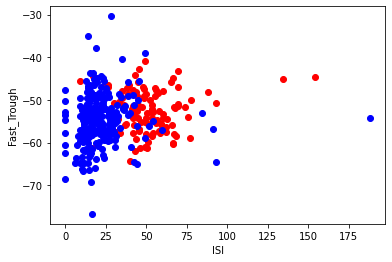

In [ ]:
#create scatterplot, ISI values vs Fast_Trough values, Sst are red, pvalb are blue
fig, ax = plt.subplots()
for i, row in patch_seq.iterrows():
    c = "blue"
    cell_type = row["Marker"]
    if cell_type == "Sst":
      c = "red"
    ax.scatter(row["ISI"], row["Fast_Trough"], color=c)


ax.set_xlabel("ISI")
ax.set_ylabel("Fast_Trough")

In [ ]:
# creates patchScatter() method, creates above sctter plot from patch_seq data

def patchScatter():
  fig, ax = plt.subplots()
  for i, row in patch_seq.iterrows():
    c = "blue"
    cell_type = row["Marker"]
    if cell_type == "Sst":
      c = "red"
    ax.scatter(row["ISI"], row["Fast_Trough"], color=c)


  ax.set_xlabel("ISI")
  ax.set_ylabel("Fast_Trough")

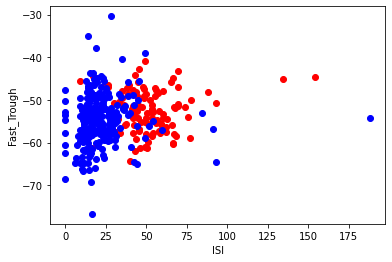

In [ ]:
# calls patchScatter() method
patchScatter()

In [ ]:
#returns mean, SD, range of Fast_Trough values of Sst and Pvalb neurons
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


Pvalb neurons have a greater undershoot after an action potential than Sst neurons.

In [ ]:
#Preforms skew tests on fast_trough data from each cell marker type
sstSkew = patch_seq.loc[patch_seq["Marker"] == "Sst", "Fast_Trough"].skew()

pvalbSkew = patch_seq.loc[patch_seq["Marker"] == "Pvalb", "Fast_Trough"].skew()

print(sstSkew)
print(pvalbSkew)

0.001250247152569411
0.19535970702862004


#Sst Fast Trough data is not skewed. *(-.05 < .0013 < .05)*
#Pvalb Fast Trough data is skewed. *(.19 > .05)*

In [ ]:
#returns mean, SD, range of ISI values of Sst and Pvalb neurons
patch_seq.groupby('Marker')['ISI'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,21.736253,16.269051,0.00,13.865085,18.350901,26.334931,187.986667
Sst,109.0,51.528430,19.698230,8.98,42.066957,49.844211,59.962667,154.140000


In [ ]:
#preforms skew test of ISI data for each cell marker type
sstSkewISI = patch_seq.loc[patch_seq["Marker"] == "Sst", "ISI"].skew()

pvalbSkewISI = patch_seq.loc[patch_seq["Marker"] == "Pvalb", "ISI"].skew()

print(sstSkewISI)
print(pvalbSkewISI)

1.8578496085835894
5.200361820746456


In [ ]:
#preforms T test between fast_trough data of Sst and pvalb neurons
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

#There is a significant difference between undershoot voltage of each marker type. P value is less than .05 (.0017)

In [ ]:
#preforms T test between ISI data of Sst and pvalb neurons
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'], nan_policy='omit')

Ttest_indResult(statistic=14.643966775010771, pvalue=2.694292788633648e-38)

#Definitely a significant difference between ISI of Sst and Pvalb neurons. P value <<< .05 (2.7e-38)